<a href="https://colab.research.google.com/github/Varsha35-wq/SCT_ML_1/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded=files.upload()

Saving House Price India.csv to House Price India.csv


In [3]:
filename = next(iter(uploaded))

# Now read it into pandas
df = pd.read_csv(filename)

# Now you can access columns
print(df.columns)

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')


In [4]:
feature_cols = ["Area of the house(excluding basement)", "number of bedrooms", "number of bathrooms"]   # <- edit if necessary
target_col   = "Price"

In [5]:
X = df[feature_cols]
y = df[target_col]

# Optional: quick sanity check for missing values
if X.isnull().any().any() or y.isnull().any():
    print("Warning: dataset contains NaNs – consider imputing or dropping rows.")

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred    = lin_reg.predict(X_test)
mae       = mean_absolute_error(y_test, y_pred)
rmse      = np.sqrt(mean_squared_error(y_test, y_pred))
r2        = r2_score(y_test, y_pred)

In [9]:
print(f"MAE : {mae:,.0f}")
print(f"RMSE: {rmse:,.0f}")
print(f"R²  : {r2:.3f}")

MAE : 185,748
RMSE: 287,607
R²  : 0.413


In [10]:
cv_scores = cross_val_score(lin_reg, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(f"5-fold CV RMSE: {-cv_scores.mean():,.0f} ± {cv_scores.std():,.0f}")

5-fold CV RMSE: 284,095 ± 13,588


In [11]:
coeff_df = pd.DataFrame({
    "Feature": feature_cols,
    "Coefficient": lin_reg.coef_
})
display(coeff_df)

,Feature,Coefficient
0,Area of the house(excluding basement),212.753263
1,number of bedrooms,-13604.389332
2,number of bathrooms,102433.300150


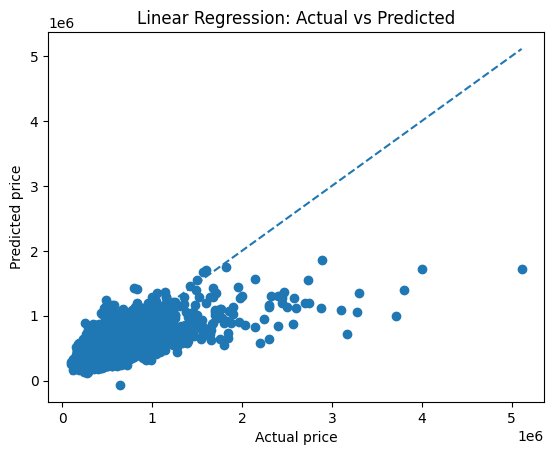

In [12]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.show()